In [ ]:
! pip install contractions
! pipn install plotly_express

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 9.4 MB/s eta 0:00:00
/bin/bash: line 1: pipn: command not found


In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/LIDCI/5/PROCESAMIENTO DE LENGUAJE NATURAL/SuicTweets (2).csv')
df.head()

,tweet,intention
0,my life is meaningless i just want to end my l...,1
1,muttering i wanna die to myself daily for a fe...,1
2,work slave i really feel like my only purpose ...,1
3,i did something on the 2 of october i overdose...,1
4,i feel like no one cares i just want to die ma...,1


In [ ]:
import contractions
import re
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')
stop_words_en = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
mapper = {
    1: 'SUICIDE',
    0: 'NOT SUICIDE'
}
df['label']=df['intention'].map(mapper)
df.head()

,tweet,intention,label
0,my life is meaningless i just want to end my l...,1,SUICIDE
1,muttering i wanna die to myself daily for a fe...,1,SUICIDE
2,work slave i really feel like my only purpose ...,1,SUICIDE
3,i did something on the 2 of october i overdose...,1,SUICIDE
4,i feel like no one cares i just want to die ma...,1,SUICIDE


In [ ]:
df['label'].value_counts()

,count
label,
NOT SUICIDE,5121
SUICIDE,3998


In [ ]:
from tqdm import tqdm
import contractions
tqdm.pandas()

def preprocesamiento_texto(texto):
  #Arreglar texto
  texto = contractions.fix(texto)
  #Hacer texto minusculo
  texto = texto.lower()
  #regex
  texto = re.sub(r'[^a-zA-Z\s]','', texto)
  #Tokenizar
  texto = word_tokenize(texto)
  #Quitar stopwords
  texto = [token for token in texto if token not in stop_words_en]
  #Lemmatizar
  texto = [lemmatizer.lemmatize(word) for word in texto]
  #juntar todo en string
  texto = ' '.join(texto)
  return texto

In [ ]:
df['clean_tweet']=df['tweet'].progress_apply(preprocesamiento_texto)
df.head()

100%|██████████| 9119/9119 [00:15<00:00, 602.52it/s] 


,tweet,intention,label,clean_tweet
0,my life is meaningless i just want to end my l...,1,SUICIDE,life meaningless want end life badly life comp...
1,muttering i wanna die to myself daily for a fe...,1,SUICIDE,muttering want die daily month feel worthless ...
2,work slave i really feel like my only purpose ...,1,SUICIDE,work slave really feel like purpose life make ...
3,i did something on the 2 of october i overdose...,1,SUICIDE,something october overdosed felt alone horribl...
4,i feel like no one cares i just want to die ma...,1,SUICIDE,feel like one care want die maybe feel less lo...


In [ ]:
X = df['clean_tweet']
y = df['intention']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state =101)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2))
X_train_vectorized = tfidf_vectorizer.fit_transform(X_train)
X_test_vectorized = tfidf_vectorizer.transform(X_test)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

Train Score: 0.9943600187999373
Test Score: 0.9053362573099415
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1559
           1       0.89      0.89      0.89      1177

    accuracy                           0.91      2736
   macro avg       0.90      0.90      0.90      2736
weighted avg       0.91      0.91      0.91      2736



<Axes: >

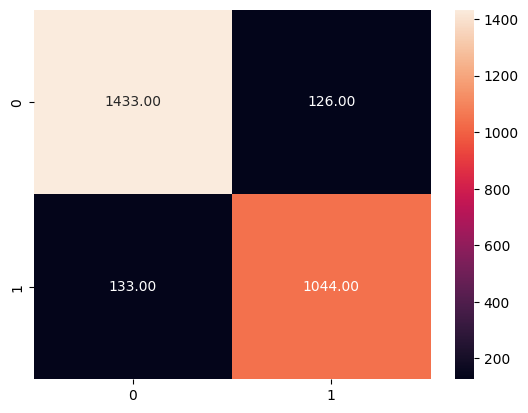

In [ ]:
modelo_1 = SVC()
modelo_1.fit(X_train_vectorized, y_train)
y_pred = modelo_1.predict(X_test_vectorized)
print(f"Train Score: {modelo_1.score(X_train_vectorized,y_train)}")
print(f"Test Score: {modelo_1.score(X_test_vectorized,y_test)}")
print(classification_report(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='.2f')

Train Score: 0.9962400125332915
Test Score: 0.5727339181286549
              precision    recall  f1-score   support

           0       0.57      1.00      0.73      1559
           1       0.83      0.01      0.02      1177

    accuracy                           0.57      2736
   macro avg       0.70      0.50      0.37      2736
weighted avg       0.68      0.57      0.42      2736



<Axes: >

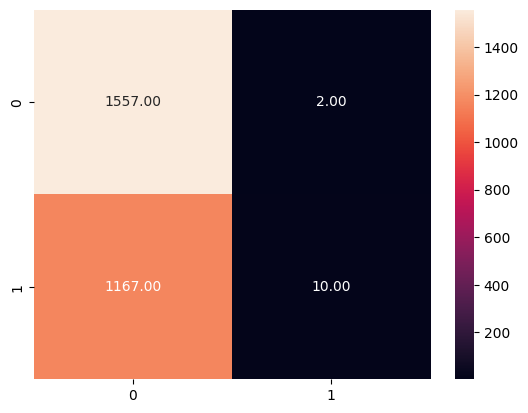

In [ ]:
modelo_1 = SVC(C=1000,gamma=100)
modelo_1.fit(X_train_vectorized, y_train)
y_pred = modelo_1.predict(X_test_vectorized)
print(f"Train Score: {modelo_1.score(X_train_vectorized,y_train)}")
print(f"Test Score: {modelo_1.score(X_test_vectorized,y_test)}")
print(classification_report(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='.2f')

Train Score: 0.5580448065173116
Test Score: 0.5698099415204678
              precision    recall  f1-score   support

           0       0.57      1.00      0.73      1559
           1       0.00      0.00      0.00      1177

    accuracy                           0.57      2736
   macro avg       0.28      0.50      0.36      2736
weighted avg       0.32      0.57      0.41      2736



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Axes: >

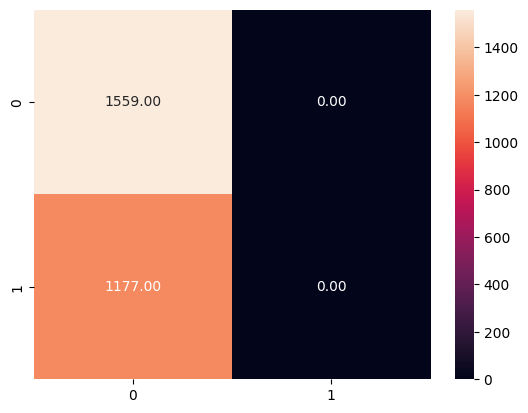

In [ ]:
modelo_1 = SVC(C=0.01,gamma=1)
modelo_1.fit(X_train_vectorized, y_train)
y_pred = modelo_1.predict(X_test_vectorized)
print(f"Train Score: {modelo_1.score(X_train_vectorized,y_train)}")
print(f"Test Score: {modelo_1.score(X_test_vectorized,y_test)}")
print(classification_report(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='.2f')